In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [3]:
# 데이터셋 불러오기
dataset = pd.read_csv('/content/AABA_2006-01-01_to_2018-01-01.csv', index_col = 'Date')
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
# training_set test_set 나누기
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

print(len(training_set))
print(len(test_set))

2516
251


In [5]:
# MinMaxScaler으로 training_set_scaled 정의
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# training_set 정규화
X_train = []
y_train = []

for i in range(60, len(training_set)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# X_train 3차원으로 재배열
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# LSTM 모델 생성
regressor = Sequential()
# First Layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Third Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Fourth Layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units = 1))
# 모델 컴파일링
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
77/77 [==============================] - 16s 113ms/step - loss: 0.0126
Epoch 2/50
77/77 [==============================] - 7s 97ms/step - loss: 0.0067
Epoch 3/50
77/77 [==============================] - 10s 125ms/step - loss: 0.0048
Epoch 4/50
77/77 [==============================] - 9s 114ms/step - loss: 0.0046
Epoch 5/50
77/77 [==============================] - 7s 97ms/step - loss: 0.0040
Epoch 6/50
77/77 [==============================] - 9s 114ms/step - loss: 0.0038
Epoch 7/50
77/77 [==============================] - 8s 109ms/step - loss: 0.0035
Epoch 8/50
77/77 [==============================] - 8s 101ms/step - loss: 0.0032
Epoch 9/50
77/77 [==============================] - 9s 115ms/step - loss: 0.0031
Epoch 10/50
77/77 [==============================] - 10s 126ms/step - loss: 0.0028
Epoch 11/50
77/77 [==============================] - 8s 102ms/step - loss: 0.0025
Epoch 12/50
77/77 [==============================] - 11s 143ms/step - loss: 0.0027
Epoch 13/50
77/77 [====

In [17]:
# test_set의 입력데이터 inputs 정의
dataset_total = dataset['High']
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [18]:
# test_set 정규화 후 예측하기
X_test = []
for i in range(60, len(test_set)+60):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 29ms/step


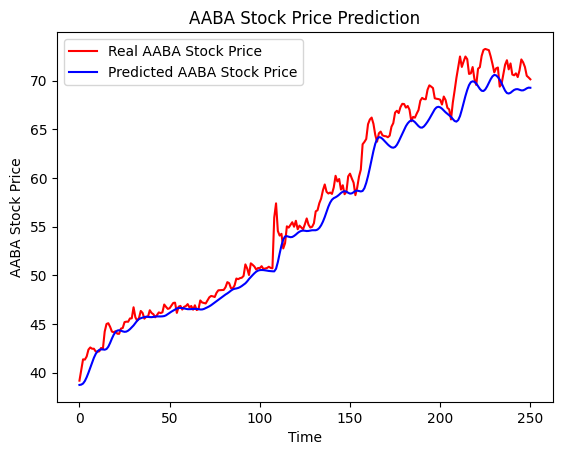

In [19]:
# 실제 값과 예측 값 그래프 시각화
def plot_prediction(test, predicted):
  plt.plot(test, color = 'red', label = 'Real AABA Stock Price')
  plt.plot(predicted, color = 'blue', label = 'Predicted AABA Stock Price')
  plt.title('AABA Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('AABA Stock Price')
  plt.legend()
  plt.show

plot_prediction(test_set, predicted_stock_price)

In [20]:
# 모델의 rmse 구하기
def return_mse(test, predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print('The root mean squared error is {}.'.format(rmse))

return_mse(test_set, predicted_stock_price)

The root mean squared error is 1.9151729016526855.
